In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0).fit(X)
labels=clustering.labels_

C:\anaconda 3\envs\myenv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:411: UserWarning: Exited at iteration 446 with accuracies 
[1.73106897e-15 4.26494923e-06 2.74149118e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 446 instead with accuracy 
2.3354801372884365e-06.

  _, diffusion_map = lobpcg(
C:\anaconda 3\envs\myenv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:411: UserWarning: Exited postprocessing with accuracies 
[1.27957072e-15 4.26494921e-06 2.74149121e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(


In [6]:
supervised=pd.DataFrame(dataset)

In [7]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
supervised['Cluster_group']=labels

In [11]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [12]:
supervised.to_csv("cluster.csv",index=False)

In [14]:
supervised.columns[3]

'Annual Income (k$)'

In [15]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

C:\anaconda 3\envs\myenv\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


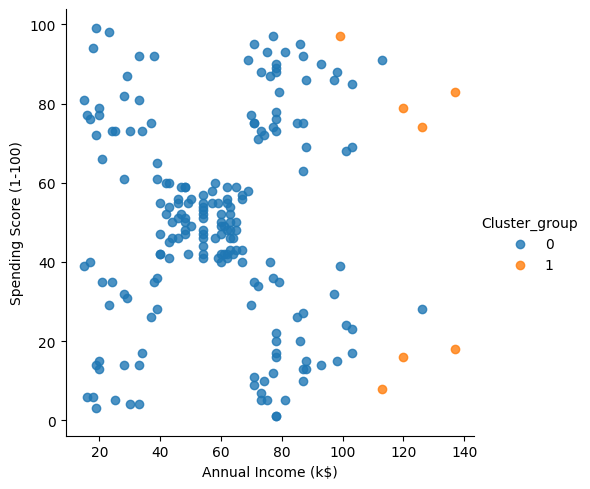

In [16]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False,legend_out=True)